In [19]:
# importing libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
dataset= pd.read_csv('CC_GENERAL.csv')

In [21]:
# to know about dataset shape
dataset.shape

(8950, 18)

In [22]:
# to find which column has null 
dataset.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [23]:
#remove or fill null rows 
dataset = dataset.dropna(subset=['CREDIT_LIMIT'])
payment_null = dataset['MINIMUM_PAYMENTS'].mode()[0]
dataset['MINIMUM_PAYMENTS'].fillna(payment_null, inplace=True)

In [24]:
# to know how many duplicate rows
duplicates = dataset.duplicated().sum()
print(duplicates)

0


In [25]:
# to see dataset first rows

dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,299.351881,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [26]:
# to see last rows of dataset

dataset.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,299.351881,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [27]:
# to know a summary about dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8949 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8949 non-null   object 
 1   BALANCE                           8949 non-null   float64
 2   BALANCE_FREQUENCY                 8949 non-null   float64
 3   PURCHASES                         8949 non-null   float64
 4   ONEOFF_PURCHASES                  8949 non-null   float64
 5   INSTALLMENTS_PURCHASES            8949 non-null   float64
 6   CASH_ADVANCE                      8949 non-null   float64
 7   PURCHASES_FREQUENCY               8949 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8949 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8949 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8949 non-null   float64
 11  CASH_ADVANCE_TRX                  8949 non-null   int64  
 12  PURCHA

In [28]:
# to know main statistical factors about dataset
dataset.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1564.647593,0.877350,1003.316936,592.503572,411.113579,978.959616,0.490405,0.202480,0.364478,0.135141,3.249078,14.711476,4494.449450,1733.336511,844.545159,0.153732,11.517935
std,2081.584016,0.236798,2136.727848,1659.968851,904.378205,2097.264344,0.401360,0.298345,0.397451,0.200132,6.824987,24.858552,3638.815725,2895.168146,2333.011131,0.292511,1.337134
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,299.351881,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [29]:
#remove columns that is not important
dataset = dataset.drop(['CUST_ID'], axis=1)

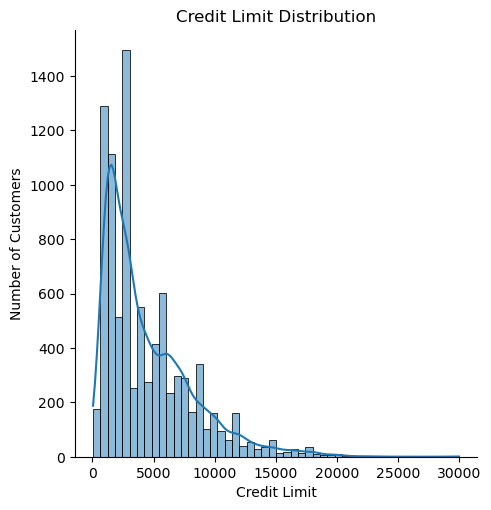

In [30]:
#to see credit limit distribution
sns.displot(data=dataset, x='CREDIT_LIMIT', kde=True, bins=50)
plt.xlabel('Credit Limit')
plt.ylabel('Number of Customers')
plt.title('Credit Limit Distribution')
plt.show()

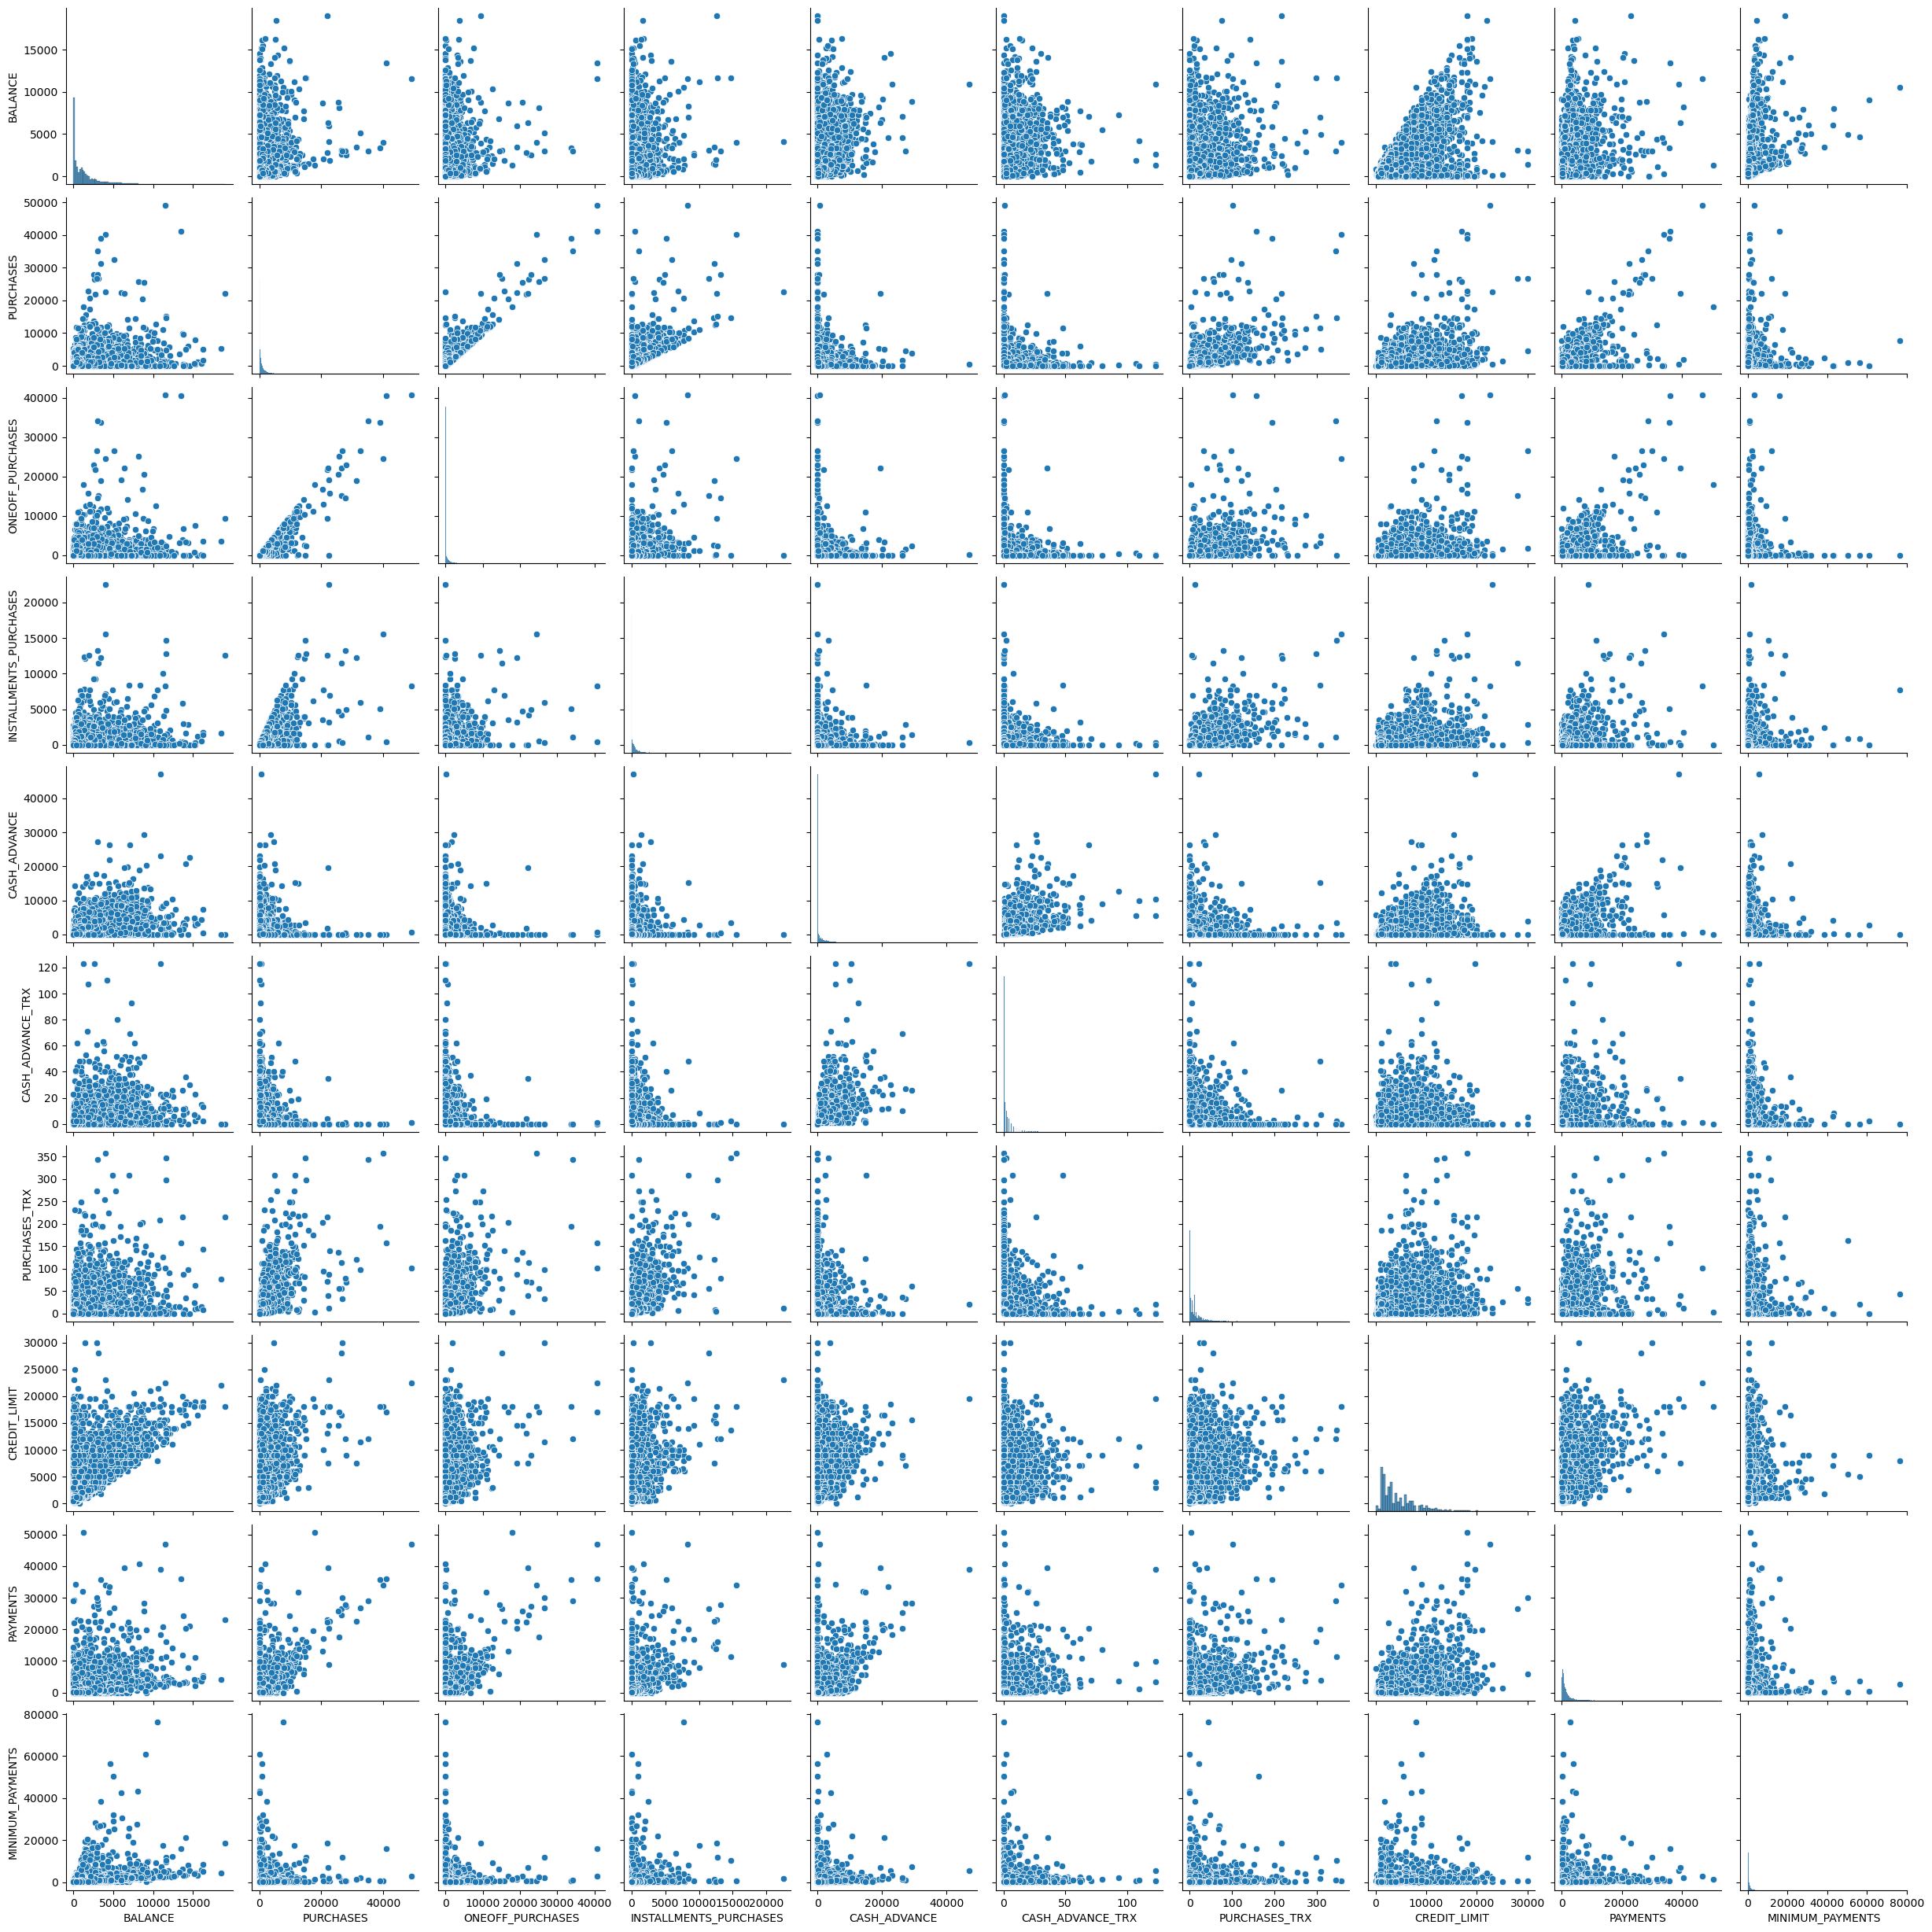

In [31]:
# to see outliers
sns.pairplot(dataset.loc[:, ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
                             'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT',
                             'PAYMENTS', 'MINIMUM_PAYMENTS']])


In [32]:
# find outliers using IQR
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5 * IQR
for col in dataset.columns:
    if dataset[col].dtype != 'object': 
        dataset[col] = np.where(dataset[col] < (Q1[col] - threshold[col]), Q1[col] - threshold[col], dataset[col])
        dataset[col] = np.where(dataset[col] > (Q3[col] + threshold[col]), Q3[col] + threshold[col], dataset[col])
X = pd.DataFrame(StandardScaler().fit_transform(dataset.select_dtypes(include=np.number)))
pca = PCA(n_components=2, random_state=24)
X = pca.fit_transform(X)

<Figure size 640x480 with 0 Axes>

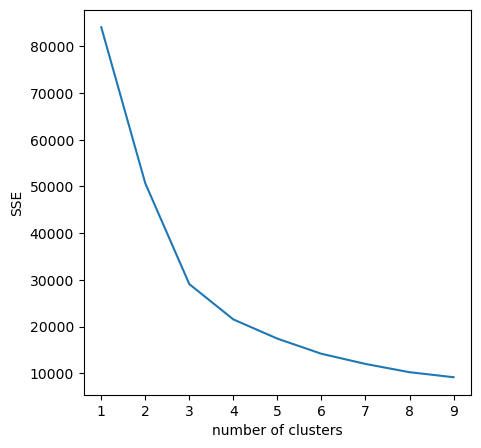

In [33]:
#elbow
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init=10).fit(X)
    sse[k] = kmeans.inertia_  

plt.figure()
plt.figure(figsize=(5, 5))
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("number of clusters")
plt.ylabel("SSE")
plt.show()


In [34]:
#run K-mean method
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500, n_init=10)
y_kmeans = kmeans.fit_predict(X)
dataset['cluster_id'] = kmeans.labels_
labels=kmeans.labels_

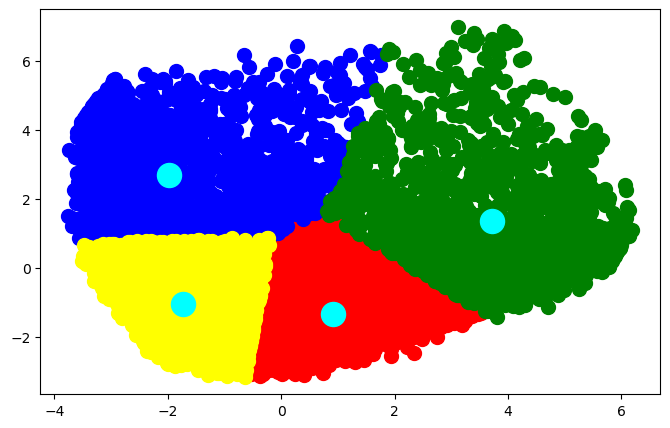

In [35]:
plt.figure(figsize=(8, 5))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='yellow', label ='Cluster 4')

plt.scatter(kmeans .cluster_centers_[:, 0], kmeans .cluster_centers_[:, 1], s=300, c='cyan', label = 'Centroids')
plt.show()

<Figure size 1000x500 with 0 Axes>

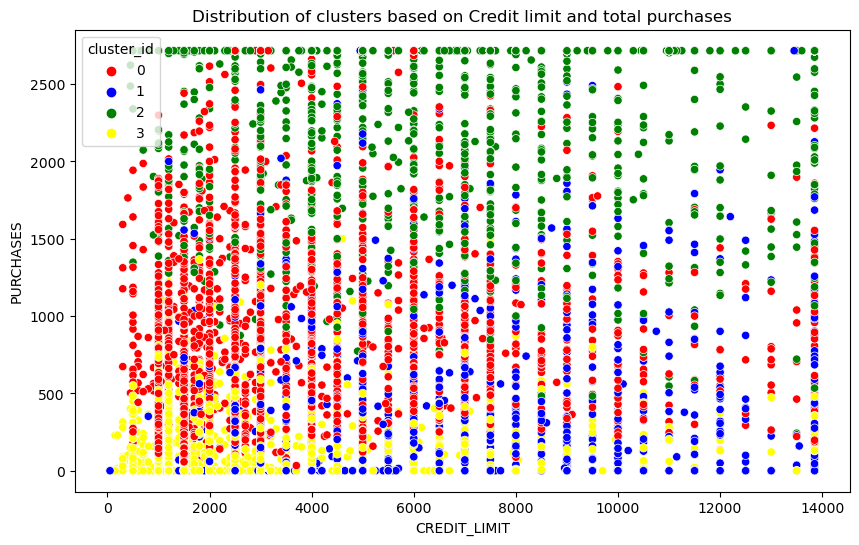

In [36]:
plt.figure(figsize=(10, 5))
custom_palette = ['red', 'blue', 'green', 'yellow']

plt.figure(figsize=(10,6))
sns.scatterplot(data=dataset, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_id', palette=custom_palette)
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()


In [37]:
# silhouette score for K-mean
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_kmeans)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.39405844900034026


In [38]:
from collections import Counter
cluster_counts = Counter(y_kmeans)
total_samples = len(y_kmeans)
for cluster, count in cluster_counts.items():
    percentage = (count / total_samples) * 100
    print(f"Cluster {cluster + 1}: {percentage:.2f}%")

Cluster 4: 31.72%
Cluster 2: 19.25%
Cluster 1: 31.75%
Cluster 3: 17.28%


Text(0, 0.5, 'euclidean distance')

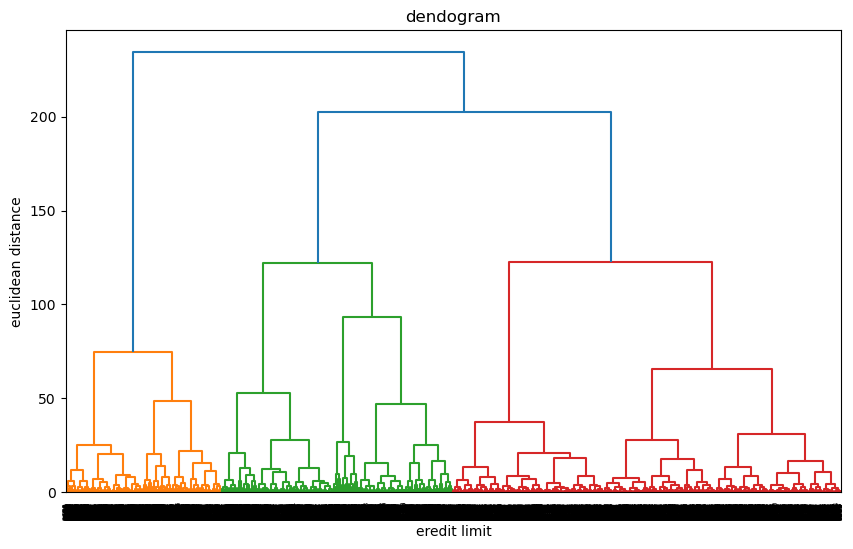

In [39]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize =(10, 6)) 
Dendrogram = shc.dendrogram((shc.linkage(X, method ='ward'))) 
plt.title('dendogram') 
plt.xlabel('eredit limit')
plt.ylabel('euclidean distance')

In [40]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

Text(0.5, 1.0, 'clusters of credit limit')

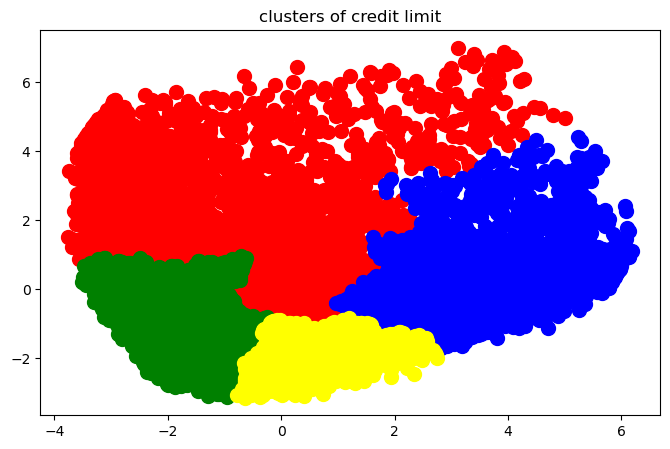

In [41]:
#visualising
plt.figure(figsize=(8, 5))
plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='yellow', label ='Cluster 4')
plt.title('clusters of credit limit')

In [46]:
# silhouette_score for hierarchical 
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, y_hc)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3101089131767257
